<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 3.1 Hello World

In [1]:
# 3.1 Hello World 프로그램
print("Hello, World!")

Hello, World!


In [2]:
# 3.2 Hello World 프로그램 첫 줄의 # 를 지웠을 때 에러가 나는 모습
#3.1 Hello World
print("Hello, World!")

Hello, World!


In [3]:
# 3.3 Hello World 프로그램 문자열의 따옴표(“)를 홑따옴표(‘)로 바꿈
print('Hello, World!')

Hello, World!


# 3.2 Hello 텐서플로 2.0

In [4]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [5]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Darwin-20.3.0-x86_64-i386-64bit


In [6]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.4.1


In [7]:
# 3.6 텐서플로우 불러오기, 버전 확인 에러
import tensorflow as tf
print(tf.__version__)

2.4.1


# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [8]:
# 3.7 랜덤한 수 얻기 (균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.7794707], shape=(1,), dtype=float32)


In [9]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.22658491 0.83389664 0.26776898 0.61267734], shape=(4,), dtype=float32)


In [10]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 0.63036555 -1.9412307  -1.5635748  -0.81605256], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

In [11]:
# 3.10 sigmoid 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [12]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

0.32072125294436976


In [13]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.08707737859641272 0.08707737859641272
199 -0.04790555302055297 0.04790555302055297
299 -0.03278853064022544 0.03278853064022544
399 -0.024858749284035836 0.024858749284035836
499 -0.01999382996718109 0.01999382996718109
599 -0.016710766790560667 0.016710766790560667
699 -0.014348341878941205 0.014348341878941205
799 -0.012568060941782998 0.012568060941782998
899 -0.01117891645641779 0.01117891645641779
999 -0.01006507939490627 0.01006507939490627


In [14]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [15]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.07968047965585734 0.9203195203441427
199 0.045493277290200584 0.9545067227097994
299 0.03162414791718071 0.9683758520828193
399 0.024178701960074322 0.9758212980399257
499 0.0195495415452992 0.9804504584547008
599 0.016398286439024634 0.9836017135609754
699 0.014116844834113906 0.9858831551658861
799 0.012389757947296909 0.9876102420527031
899 0.011037462010909493 0.9889625379890905
999 0.009950153886153501 0.9900498461138465


## 3.3.3 첫번째 신경망 네트워크 : AND

In [16]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [17]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.10876910564676917
399 -0.06516038788884798
599 -0.04639627285066393
799 -0.03592030317787996
999 -0.029250269047328036
1199 -0.024640649221073646
1399 -0.021270688371111308
1599 -0.018702292616054324
1799 -0.016680188938448085
1999 -0.015047887691234387


In [18]:
# 3.17 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [19]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
# print([1,2,3]*0.01)

In [20]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [21]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9648678928598438
X: [1 0] Y: [0] Output: 0.024895672020964387
X: [0 1] Y: [0] Output: 0.0249718372820965
X: [0 0] Y: [0] Output: 2.3808504120815614e-05


## 3.3.4 두번째 신경망 네트워크 : OR

In [22]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.057627867834242674
399 -0.02749047835710039
599 -0.018086755640470104
799 -0.013440958590197907
999 -0.010675308025150598
1199 -0.008844206592986341
1399 -0.007544537001605699
1599 -0.006574969053202068
1799 -0.005824589589489171
1999 -0.0052257333225028055


In [23]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.999997079050604
X: [1 0] Y: [1] Output: 0.989660675211867
X: [0 1] Y: [1] Output: 0.9895964538007479
X: [0 0] Y: [0] Output: 0.025905818812116347


## 3.3.5 세번째 신경망 네트워크 : XOR

In [24]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 0.002006363938093947
399 8.154358679601792e-05
599 3.313331583321144e-06
799 1.3960658440392848e-07
999 3.722842145670313e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [25]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [26]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [27]:
# 3.26 AND 네트워크의 w, b 값 확인
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

In [28]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2240
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2523
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2540
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2608
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2580
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2649
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2586
Epoch 13/2000
4/4 [==============================

4/4 [==============================] - 0s 1ms/step - loss: 0.2629
Epoch 104/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 105/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 106/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 107/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 108/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 109/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2544
Epoch 110/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2615
Epoch 111/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 112/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 113/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 114/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2520
Epoch 115/2000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.2484
Epoch 205/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2557
Epoch 206/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2653
Epoch 207/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 208/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 209/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 210/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 211/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2605
Epoch 212/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2538
Epoch 213/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2610
Epoch 214/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2619
Epoch 215/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 216/2000
4/4 [=======================

Epoch 305/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2580
Epoch 306/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2613
Epoch 307/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2565
Epoch 308/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2509
Epoch 309/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2568
Epoch 310/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2597
Epoch 311/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 312/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 313/2000
4/4 [==============================] - 0s 845us/step - loss: 0.2574
Epoch 314/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 315/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2509
Epoch 316/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2597
Epoch 317/2000
4/4 [======

4/4 [==============================] - 0s 1ms/step - loss: 0.2495
Epoch 406/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2521
Epoch 407/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2512
Epoch 408/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2558
Epoch 409/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2530
Epoch 410/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2609
Epoch 411/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2563
Epoch 412/2000
4/4 [==============================] - 0s 957us/step - loss: 0.2621
Epoch 413/2000
4/4 [==============================] - 0s 863us/step - loss: 0.2568
Epoch 414/2000
4/4 [==============================] - 0s 876us/step - loss: 0.2582
Epoch 415/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2519
Epoch 416/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2556
Epoch 417/2000
4/4 [=================

4/4 [==============================] - 0s 1ms/step - loss: 0.2619
Epoch 507/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2605
Epoch 508/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2539
Epoch 509/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2628
Epoch 510/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2612
Epoch 511/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2515
Epoch 512/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 513/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2631
Epoch 514/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2529
Epoch 515/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 516/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 517/2000
4/4 [==============================] - 0s 959us/step - loss: 0.2546
Epoch 518/2000
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 608/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2478
Epoch 609/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2534
Epoch 610/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2534
Epoch 611/2000
4/4 [==============================] - 0s 950us/step - loss: 0.2565
Epoch 612/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2552
Epoch 613/2000
4/4 [==============================] - 0s 952us/step - loss: 0.2518
Epoch 614/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2479
Epoch 615/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2481
Epoch 616/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2481
Epoch 617/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2569
Epoch 618/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2480
Epoch 619/2000
4/4 [===================

4/4 [==============================] - 0s 1ms/step - loss: 0.2418
Epoch 708/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2615
Epoch 709/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2525
Epoch 710/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2427
Epoch 711/2000
4/4 [==============================] - 0s 885us/step - loss: 0.2463
Epoch 712/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2456
Epoch 713/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2366
Epoch 714/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2440
Epoch 715/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2391
Epoch 716/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 717/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2340
Epoch 718/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2417
Epoch 719/2000
4/4 [=====================

4/4 [==============================] - 0s 7ms/step - loss: 0.2164
Epoch 808/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2148
Epoch 809/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 810/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1962
Epoch 811/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 812/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2131
Epoch 813/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2156
Epoch 814/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2785
Epoch 815/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2143
Epoch 816/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1936
Epoch 817/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2105
Epoch 818/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2143
Epoch 819/2000
4/4 [=======================

4/4 [==============================] - 0s 783us/step - loss: 0.2766
Epoch 908/2000
4/4 [==============================] - 0s 791us/step - loss: 0.2721
Epoch 909/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 910/2000
4/4 [==============================] - 0s 949us/step - loss: 0.1627
Epoch 911/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 912/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2567
Epoch 913/2000
4/4 [==============================] - 0s 980us/step - loss: 0.2731
Epoch 914/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2220
Epoch 915/2000
4/4 [==============================] - 0s 901us/step - loss: 0.2150
Epoch 916/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1677
Epoch 917/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 918/2000
4/4 [==============================] - 0s 796us/step - loss: 0.1716
Epoch 919/2000
4/4 [===========

4/4 [==============================] - 0s 821us/step - loss: 0.2055
Epoch 1008/2000
4/4 [==============================] - 0s 742us/step - loss: 0.1704
Epoch 1009/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1198
Epoch 1010/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 1011/2000
4/4 [==============================] - 0s 973us/step - loss: 0.2720
Epoch 1012/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1357
Epoch 1013/2000
4/4 [==============================] - 0s 937us/step - loss: 0.2697
Epoch 1014/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1767
Epoch 1015/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1625
Epoch 1016/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2042
Epoch 1017/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2507
Epoch 1018/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1350
Epoch 1019/2000
4/4 [===

4/4 [==============================] - 0s 1ms/step - loss: 0.1158
Epoch 1107/2000
4/4 [==============================] - 0s 813us/step - loss: 0.1887
Epoch 1108/2000
4/4 [==============================] - 0s 920us/step - loss: 0.1456
Epoch 1109/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1881
Epoch 1110/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1465
Epoch 1111/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1148
Epoch 1112/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2164
Epoch 1113/2000
4/4 [==============================] - 0s 983us/step - loss: 0.2259
Epoch 1114/2000
4/4 [==============================] - 0s 861us/step - loss: 0.2190
Epoch 1115/2000
4/4 [==============================] - 0s 938us/step - loss: 0.1176
Epoch 1116/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 1117/2000
4/4 [==============================] - 0s 896us/step - loss: 0.1025
Epoch 1118/2000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.0893
Epoch 1206/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0866
Epoch 1207/2000
4/4 [==============================] - 0s 869us/step - loss: 0.1105
Epoch 1208/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 1209/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0882
Epoch 1210/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0985
Epoch 1211/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0819
Epoch 1212/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1088
Epoch 1213/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0655
Epoch 1214/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 1215/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0737
Epoch 1216/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0979
Epoch 1217/2000
4/4 [=========

4/4 [==============================] - 0s 923us/step - loss: 0.0377
Epoch 1305/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1306/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 1307/2000
4/4 [==============================] - 0s 905us/step - loss: 0.0281
Epoch 1308/2000
4/4 [==============================] - 0s 812us/step - loss: 0.0262
Epoch 1309/2000
4/4 [==============================] - 0s 801us/step - loss: 0.0379
Epoch 1310/2000
4/4 [==============================] - 0s 968us/step - loss: 0.0230
Epoch 1311/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 1312/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 1313/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 1314/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 1315/2000
4/4 [==============================] - 0s 959us/step - loss: 0.0254
Epoch 1316/2000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 1404/2000
4/4 [==============================] - 0s 947us/step - loss: 0.0151
Epoch 1405/2000
4/4 [==============================] - 0s 754us/step - loss: 0.0140
Epoch 1406/2000
4/4 [==============================] - 0s 839us/step - loss: 0.0174
Epoch 1407/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 1408/2000
4/4 [==============================] - 0s 917us/step - loss: 0.0191
Epoch 1409/2000
4/4 [==============================] - 0s 961us/step - loss: 0.0181
Epoch 1410/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 1411/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 1412/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 1413/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1414/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 1415/2000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 1503/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 1504/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 1505/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 1506/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 1507/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 1508/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 1509/2000
4/4 [==============================] - 0s 903us/step - loss: 0.0095
Epoch 1510/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 1511/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 1512/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1513/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 1514/2000
4/4 [=========

4/4 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 1603/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 1604/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 1605/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 1606/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 1607/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 1608/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 1609/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 1610/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 1611/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 1612/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 1613/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 1614/2000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 1702/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 1703/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 1704/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1705/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 1706/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 1707/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1708/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1709/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 1710/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 1711/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 1712/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 1713/2000
4/4 [===========

4/4 [==============================] - 0s 862us/step - loss: 0.0055
Epoch 1801/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 1802/2000
4/4 [==============================] - 0s 835us/step - loss: 0.0053
Epoch 1803/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 1804/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 1805/2000
4/4 [==============================] - 0s 819us/step - loss: 0.0047
Epoch 1806/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 1807/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 1808/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 1809/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 1810/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 1811/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 1812/2000
4/4 [=====

Epoch 1899/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 1900/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 1901/2000
4/4 [==============================] - 0s 983us/step - loss: 0.0036
Epoch 1902/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 1903/2000
4/4 [==============================] - 0s 792us/step - loss: 0.0038
Epoch 1904/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 1905/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 1906/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 1907/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 1908/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 1909/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1910/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 1911/2

4/4 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 1999/2000
4/4 [==============================] - 0s 898us/step - loss: 0.0031
Epoch 2000/2000
4/4 [==============================] - 0s 735us/step - loss: 0.0033


In [30]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

array([[0.0516943 ],
       [0.94834244],
       [0.9304471 ],
       [0.05870038]], dtype=float32)

In [31]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.761529,  4.852589],
       [-5.681948, -4.568876]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-3.3020716,  2.2164106], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 7.1771774],
       [-6.899831 ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([3.1920657], dtype=float32)>


# 3.4 시각화 기초

## 3.4.1	matplotlib.pyplot 을 사용한 그래프 그리기

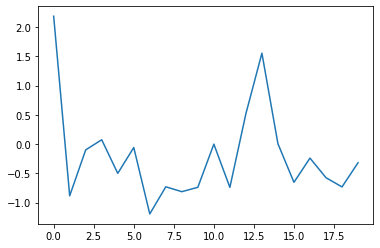

In [32]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

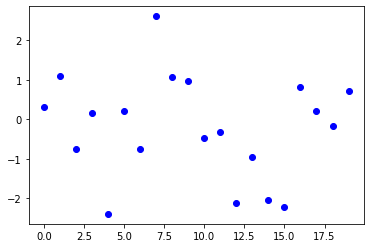

In [33]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

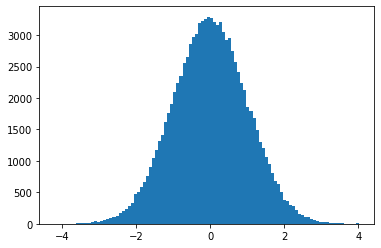

In [34]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

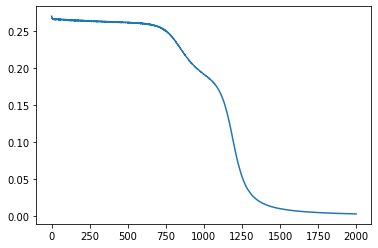

In [35]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])